In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score
)

# Mengatur agar plot matplotlib tampil inline di notebook
%matplotlib inline
# Mengatur style plot seaborn
sns.set_style('whitegrid')

# 1. Memuat Data yang Telah Diproses

Memuat data `X_train_scaled`, `X_test_scaled`, `y_train`, dan `y_test` yang telah disimpan oleh Notebook `01_EDA_dan_Preprocessing.ipynb`.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Baca dari path Google Drive yang SAMA
path_drive = '/content/drive/MyDrive/project_ml/'

X_train_scaled = pd.read_csv(path_drive + 'X_train_scaled.csv')
X_test_scaled = pd.read_csv(path_drive + 'X_test_scaled.csv')
y_train = pd.read_csv(path_drive + 'y_train.csv').values.ravel()
y_test = pd.read_csv(path_drive + 'y_test.csv').values.ravel()

print("Data berhasil dimuat dari Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data berhasil dimuat dari Google Drive.


# 2. Modeling: Logistic Regression

Melatih (training) model Logistic Regression menggunakan data latih yang sudah di-scaling.

In [20]:
# Inisialisasi model
# random_state=42 agar hasil training konsisten dan bisa direproduksi
model_lr = LogisticRegression(random_state=42)

# Latih (fit) model pada data training
model_lr.fit(X_train_scaled, y_train)

print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


# 3. Evaluasi Model

Mengevaluasi performa model pada data uji (test set) menggunakan semua metrik yang telah direncanakan di proposal (Bab 3.3).

In [21]:
# Gunakan model yang sudah dilatih untuk memprediksi data test
y_pred = model_lr.predict(X_test_scaled)

In [22]:
# Menampilkan metrik utama: Precision, Recall, F1-Score
print("Laporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred, target_names=['Selamat (0)', 'Meninggal (1)']))

# Catatan: Perhatikan skor Recall untuk kelas 'Meninggal (1)'.
# Ini adalah metrik penting dalam kasus medis (kemampuan model menemukan pasien yang berisiko).

Laporan Klasifikasi (Classification Report):
               precision    recall  f1-score   support

  Selamat (0)       0.83      0.93      0.87        41
Meninggal (1)       0.79      0.58      0.67        19

     accuracy                           0.82        60
    macro avg       0.81      0.75      0.77        60
 weighted avg       0.81      0.82      0.81        60



In [23]:
# Hitung prediksi probabilitas untuk kelas 1 (Meninggal)
y_prob = model_lr.predict_proba(X_test_scaled)[:, 1]

# Hitung metrik
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Akurasi (Accuracy): {accuracy * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Akurasi (Accuracy): 81.67%
ROC-AUC Score: 0.8588


# 4. Visualisasi Hasil Evaluasi

Membuat visualisasi yang direncanakan di proposal (Bab 3.4) untuk menganalisis performa model.

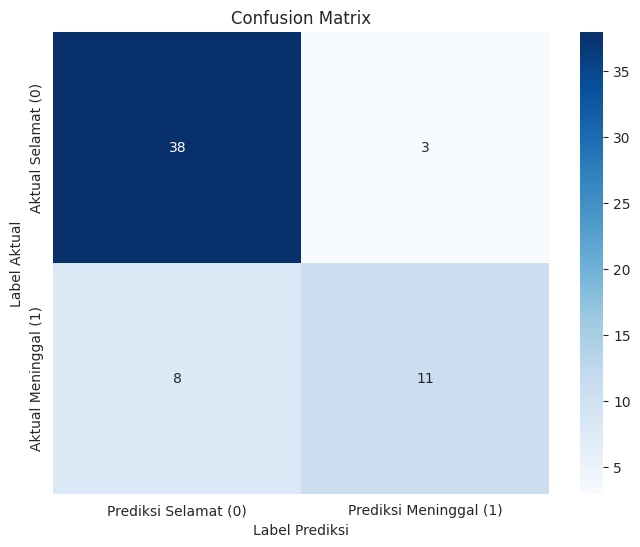

In [24]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi Selamat (0)', 'Prediksi Meninggal (1)'],
            yticklabels=['Aktual Selamat (0)', 'Aktual Meninggal (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.show()

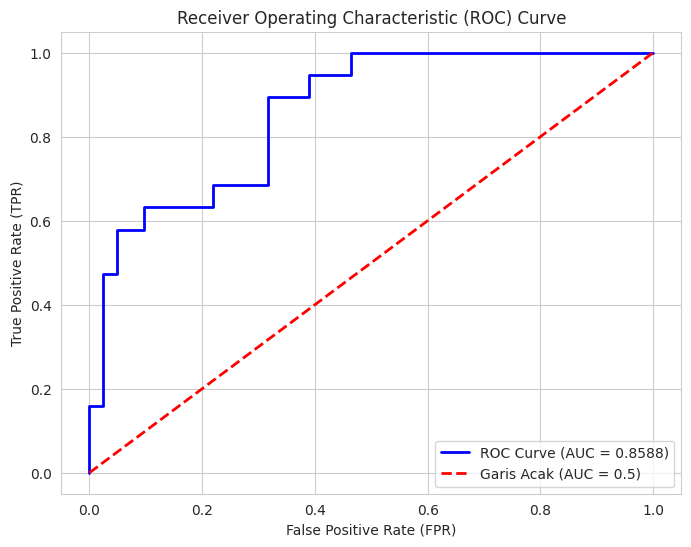

In [25]:
# Hitung FPR (False Positive Rate) dan TPR (True Positive Rate)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Garis Acak (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Analisis Koefisien (Feature Importance)

Menganalisis koefisien dari model Logistic Regression untuk memahami fitur mana yang paling berpengaruh dalam memprediksi mortalitas, sesuai tujuan proposal (Bab 1.3 dan Bab 3.4).

In [26]:
# Ambil koefisien dari model
coefficients = model_lr.coef_[0]

# Ambil nama fitur dari data X_train
feature_names = X_train_scaled.columns

# Buat DataFrame untuk memudahkan visualisasi
coef_df = pd.DataFrame({'Fitur': feature_names, 'Koefisien': coefficients})

# Urutkan berdasarkan nilai absolut koefisien untuk melihat pengaruh terkuat
coef_df['Koefisien Absolut'] = coef_df['Koefisien'].abs()
coef_df = coef_df.sort_values(by='Koefisien', ascending=False)

display(coef_df)

,Fitur,Koefisien,Koefisien Absolut
7,serum_creatinine,0.787676,0.787676
0,age,0.416343,0.416343
2,creatinine_phosphokinase,0.275913,0.275913
3,diabetes,0.242201,0.242201
10,smoking,0.111317,0.111317
1,anaemia,0.090645,0.090645
5,high_blood_pressure,0.049263,0.049263
8,serum_sodium,-0.137449,0.137449
6,platelets,-0.139808,0.139808
9,sex,-0.200936,0.200936


/tmp/ipython-input-4281834411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Koefisien', y='Fitur', data=coef_df, palette='vlag')


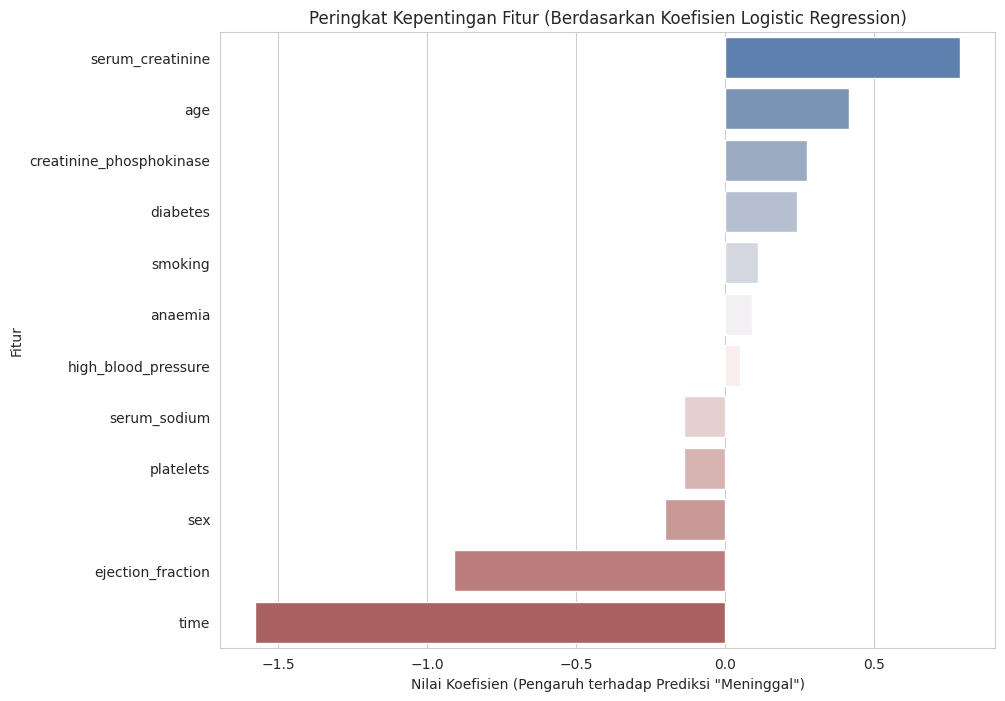


Interpretasi Koefisien:
- Batang Positif (Biru): Fitur yang berkontribusi terhadap prediksi 'Meninggal' (DEATH_EVENT = 1).
  Semakin panjang batangnya, semakin kuat pengaruhnya.
- Batang Negatif (Merah): Fitur yang berkontribusi terhadap prediksi 'Selamat' (DEATH_EVENT = 0).
  Semakin panjang batangnya ke kiri, semakin kuat pengaruh 'protektif'-nya.



In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Koefisien', y='Fitur', data=coef_df, palette='vlag')
plt.title('Peringkat Kepentingan Fitur (Berdasarkan Koefisien Logistic Regression)')
plt.xlabel('Nilai Koefisien (Pengaruh terhadap Prediksi "Meninggal")')
plt.ylabel('Fitur')
plt.show()

print("""
Interpretasi Koefisien:
- Batang Positif (Biru): Fitur yang berkontribusi terhadap prediksi 'Meninggal' (DEATH_EVENT = 1).
  Semakin panjang batangnya, semakin kuat pengaruhnya.
- Batang Negatif (Merah): Fitur yang berkontribusi terhadap prediksi 'Selamat' (DEATH_EVENT = 0).
  Semakin panjang batangnya ke kiri, semakin kuat pengaruh 'protektif'-nya.
""")

# Selesai

Modeling, evaluasi, dan analisis telah selesai. Hasil ini siap untuk disusun menjadi laporan akhir (Bab 4.2).